In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_raw, y = load_iris(return_X_y=True, as_frame=True)
df_raw['y'] = y
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   y                  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_raw.sample(10, random_state=2025)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
2                  4.7               3.2                1.3               0.2   
148                6.2               3.4                5.4               2.3   
112                6.8               3.0                5.5               2.1   
132                6.4               2.8                5.6               2.2   
0                  5.1               3.5                1.4               0.2   
113                5.7               2.5                5.0               2.0   
34                 4.9               3.1                1.5               0.2   
51                 6.4               3.2                4.5               1.5   
135                7.7               3.0                6.1               2.3   
5                  5.4               3.9                1.7               0.4   

     y  
2    0  
148  2  
112  2  
132  2  
0    0  
113  2  
34   0  
51   1  
135  2  
5    0

In [ ]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.replace(" ", "_").str.replace("(","").str.replace(")","")
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   y                150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
#EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
X_train = df_train.drop(columns='y')
y_train = df_train["y"]
X_test = df_test.drop(columns='y')
y_test = df_test["y"]

df_train.shape, df_test.shape

((135, 5), (15, 5))

In [ ]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns= X_train.columns)

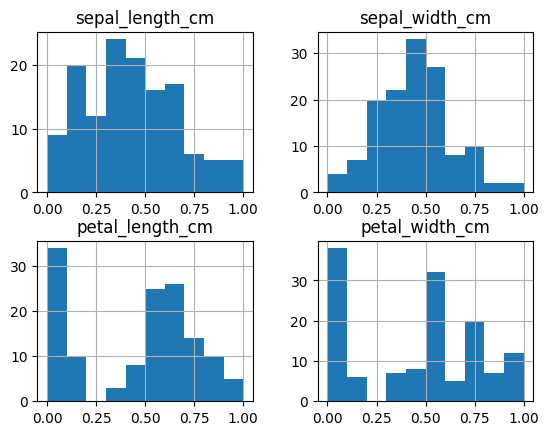

In [ ]:
X_train_sc.hist()
plt.show()

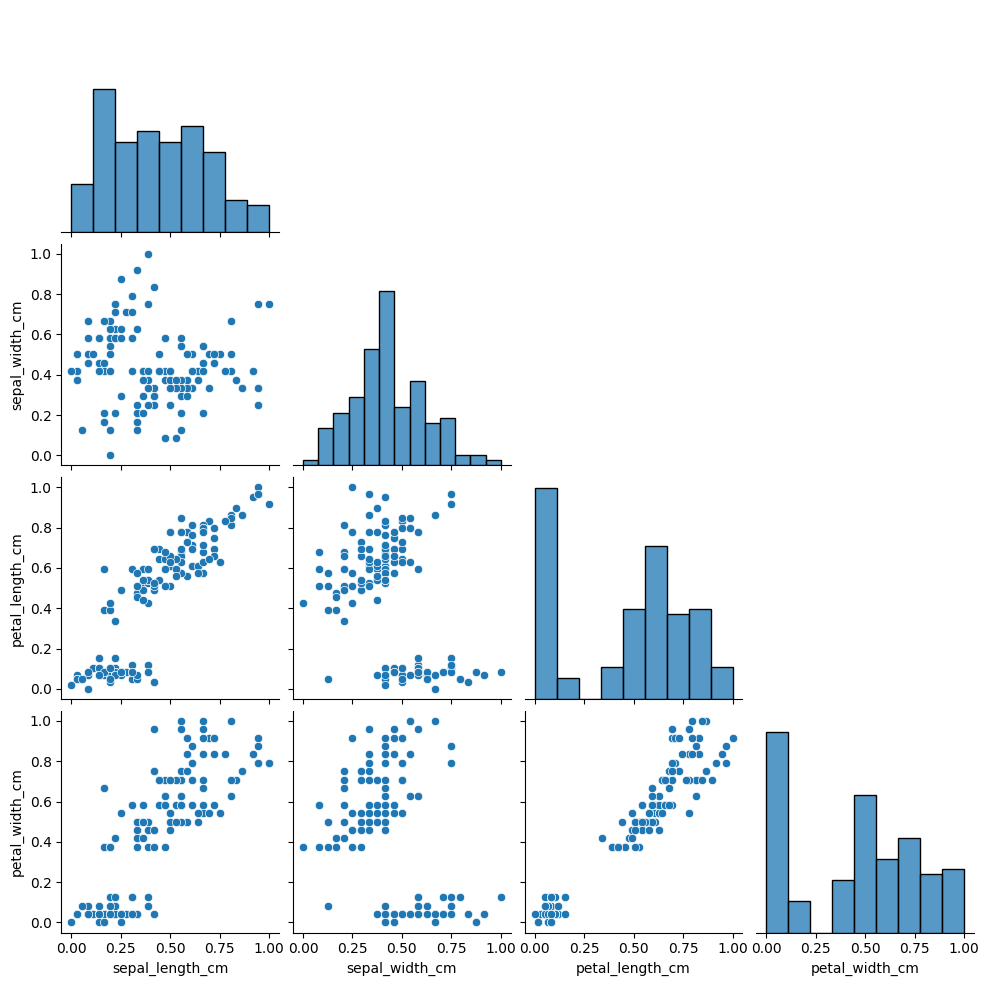

In [ ]:
sns.pairplot(X_train_sc, corner=True)
plt.show()

In [ ]:
#Step 4 ML
clue_kmeans = KMeans(n_clusters=3)
clue_kmeans.fit(X_train_sc)

KMeans(n_clusters=3)

In [ ]:
labels = clue_kmeans.labels_
df_clustered = X_train
df_clustered['cluster'] = labels

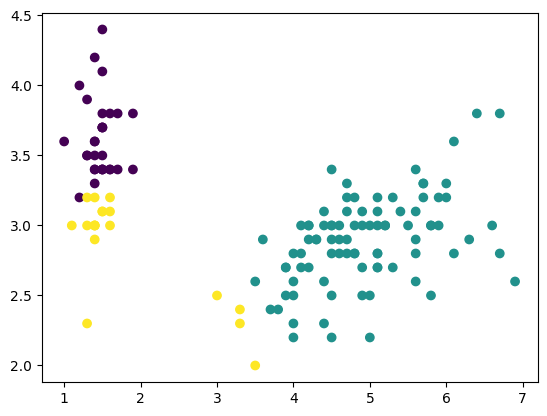

In [ ]:
plt.scatter(x=df_clustered['petal_length_cm'], y=df_clustered['sepal_width_cm'], c=df_clustered['cluster'])
plt.show()

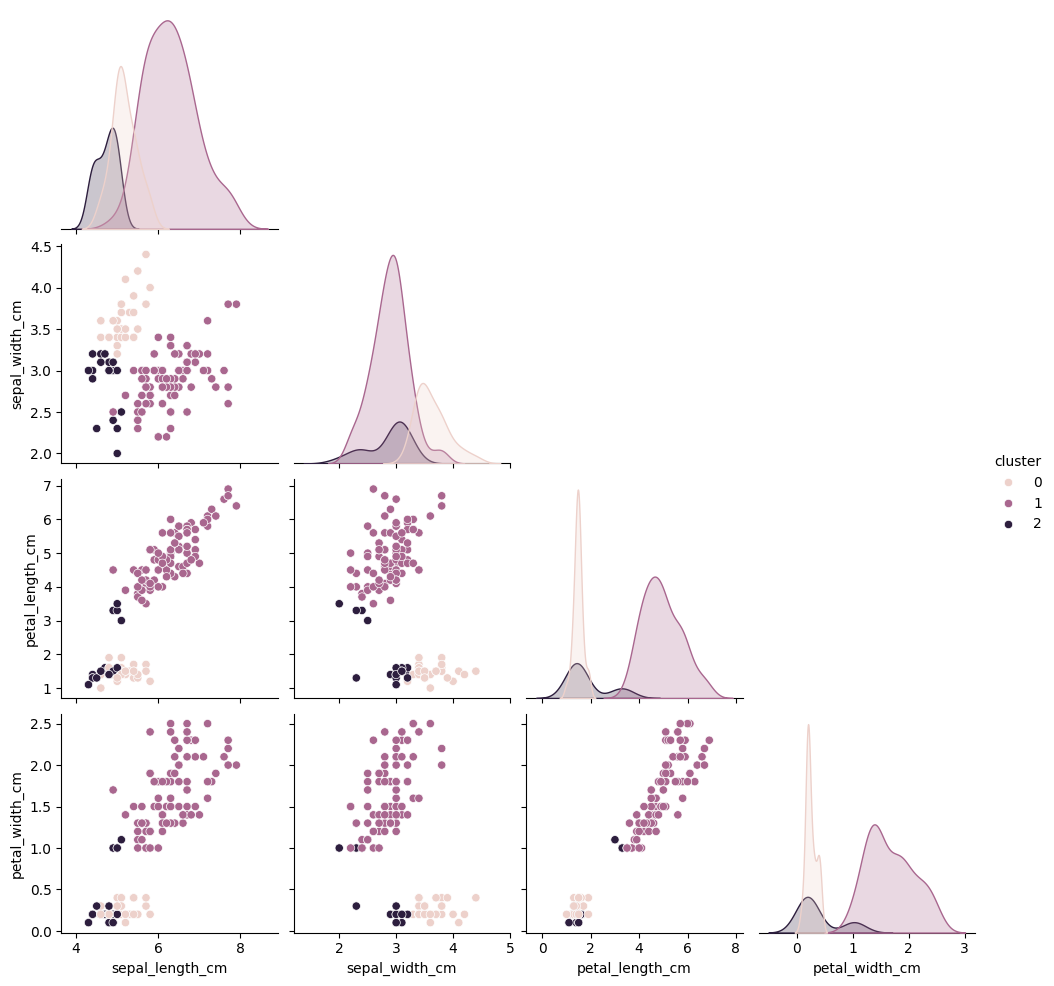

In [ ]:
sns.pairplot(df_clustered, hue='cluster', corner=True)
plt.show()

In [ ]:
df_clustered["true_cluster"] = y_train

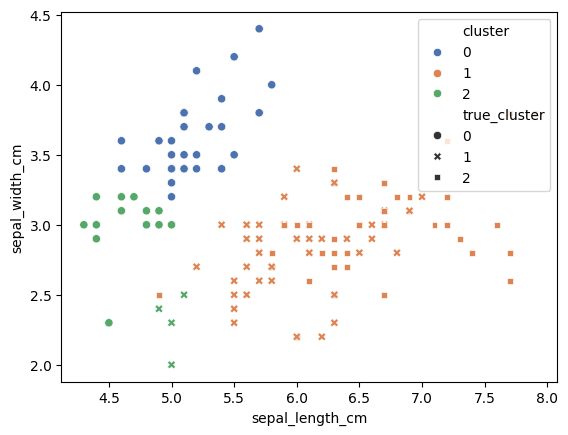

In [ ]:
sns.scatterplot(
    df_clustered,
    x='sepal_length_cm',
    y='sepal_width_cm',
    hue='cluster',
    style='true_cluster',
    palette='deep'
)
plt.show()

In [ ]:
inertia = []
K = range(1,10)
for k_iter in K:
  kmeans = KMeans(n_clusters=k_iter)
  kmeans.fit(X_train_sc)
  inertia.append(kmeans.inertia_)


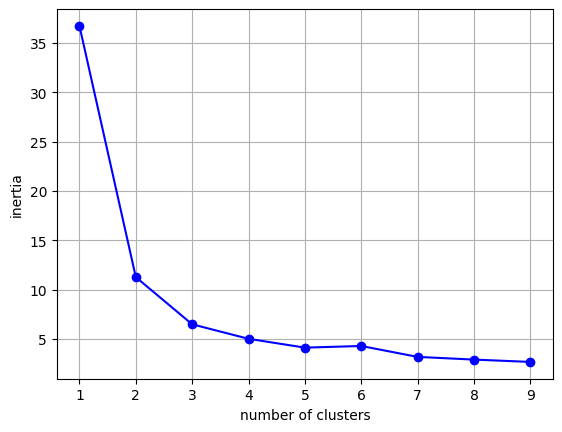

In [ ]:
plt.plot(K, inertia, "bo-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.show()

In [ ]:
clue_kmeans.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)
clue_kmeans.predict(X_test_sc)

array([2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int32)

-----

In [ ]:
x = pd.read_csv('/content/wine_quality.csv')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
x.sample(10,random_state=2025)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
828             9.7             0.420         0.46             2.1      0.074   
850             8.6             0.420         0.39             1.8      0.068   
609             9.3             0.360         0.39             1.5      0.080   
100             5.8             0.680         0.02             1.8      0.087   
929             7.0             0.620         0.10             1.4      0.071   
91              5.6             0.500         0.09             2.3      0.049   
93              8.4             0.745         0.11             1.9      0.090   
50              8.3             0.675         0.26             2.1      0.084   
307             8.0             0.670         0.30             2.0      0.060   
1026            7.3             0.670         0.02             2.2      0.072   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
828                   5.0                  16.0  0.99649  3.27       0.74   
850                   6.0                  12.0  0.99516  3.35       0.69   
609                  41.0                  55.0  0.99652  3.47       0.73   
100                  21.0                  94.0  0.99440  3.54       0.52   
929                  27.0                  63.0  0.99600  3.28       0.61   
91                   17.0                  99.0  0.99370  3.63       0.63   
93                   16.0                  63.0  0.99650  3.19       0.82   
50                   11.0                  43.0  0.99760  3.31       0.53   
307                  38.0                  62.0  0.99580  3.26       0.56   
1026                 31.0                  92.0  0.99566  3.32       0.68   

        alcohol  quality    Id  
828   12.300000        6  1172  
850   11.700000        8  1202  
609   10.900000        6   854  
100   10.000000        5   146  
929    9.200000        5  1309  
91    13.000000        5   131  
93     9.600000        5   135  
50     9.200000        4    73  
307   10.200000        6   436  
1026  11.066667        6  1439

In [ ]:
df_baking = x.copy()
df_baking.columns = df_baking.columns.str.lower().str.replace(" ","_")
df_baking = df_baking.drop(columns=['quality','id'])
df_wine = df_baking.copy()
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


In [ ]:
#EDA
df_train, df_test = train_test_split(df_wine, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
scaler = MinMaxScaler()
df_train_sc = scaler.fit_transform(df_train)
df_train_sc = pd.DataFrame(df_train_sc, columns= df_train.columns)
df_train_sc

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.245455          0.267123         0.18        0.082192   0.096990   
1          0.363636          0.178082         0.36        0.143836   0.115385   
2          0.245455          0.321918         0.26        0.075342   0.113712   
3          0.227273          0.349315         0.06        0.075342   0.118729   
4          0.190909          0.232877         0.24        0.054795   0.108696   
...             ...               ...          ...             ...        ...   
1023       0.645455          0.226027         0.63        0.089041   0.102007   
1024       0.281818          0.212329         0.25        0.116438   0.102007   
1025       0.418182          0.349315         0.21        0.123288   0.142140   
1026       0.572727          0.136986         0.52        0.061644   0.200669   
1027       0.427273          0.171233         0.44        0.047945   0.043478   

      free_sulfur_dioxide  total_sulfur_dioxide   density        ph  \
0                0.164179              0.080882  0.558737  0.614173   
1                0.432836              0.415441  0.508811  0.362205   
2                0.238806              0.360294  0.423642  0.425197   
3                0.104478              0.084559  0.622614  0.732283   
4                0.253731              0.102941  0.347283  0.511811   
...                   ...                   ...       ...       ...   
1023             0.089552              0.062500  0.709985  0.370079   
1024             0.417910              0.209559  0.446402  0.496063   
1025             0.417910              0.216912  0.640969  0.425197   
1026             0.238806              0.139706  0.533774  0.425197   
1027             0.298507              0.132353  0.381057  0.393701   

      sulphates   alcohol  
0      0.239521  0.196429  
1      0.137725  0.178571  
2      0.113772  0.267857  
3      0.239521  0.214286  
4      0.161677  0.392857  
...         ...       ...  
1023   0.215569  0.446429  
1024   0.149701  0.375000  
1025   0.149701  0.214286  
1026   0.263473  0.553571  
1027   0.287425  0.428571  

[1028 rows x 11 columns]

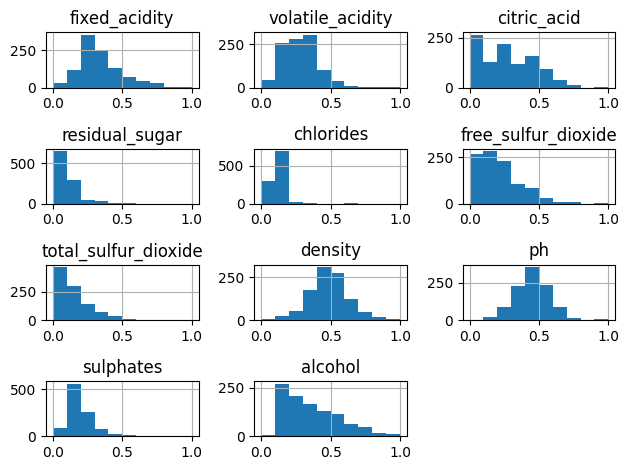

In [ ]:
df_train_sc.hist()
plt.tight_layout()
plt.show()

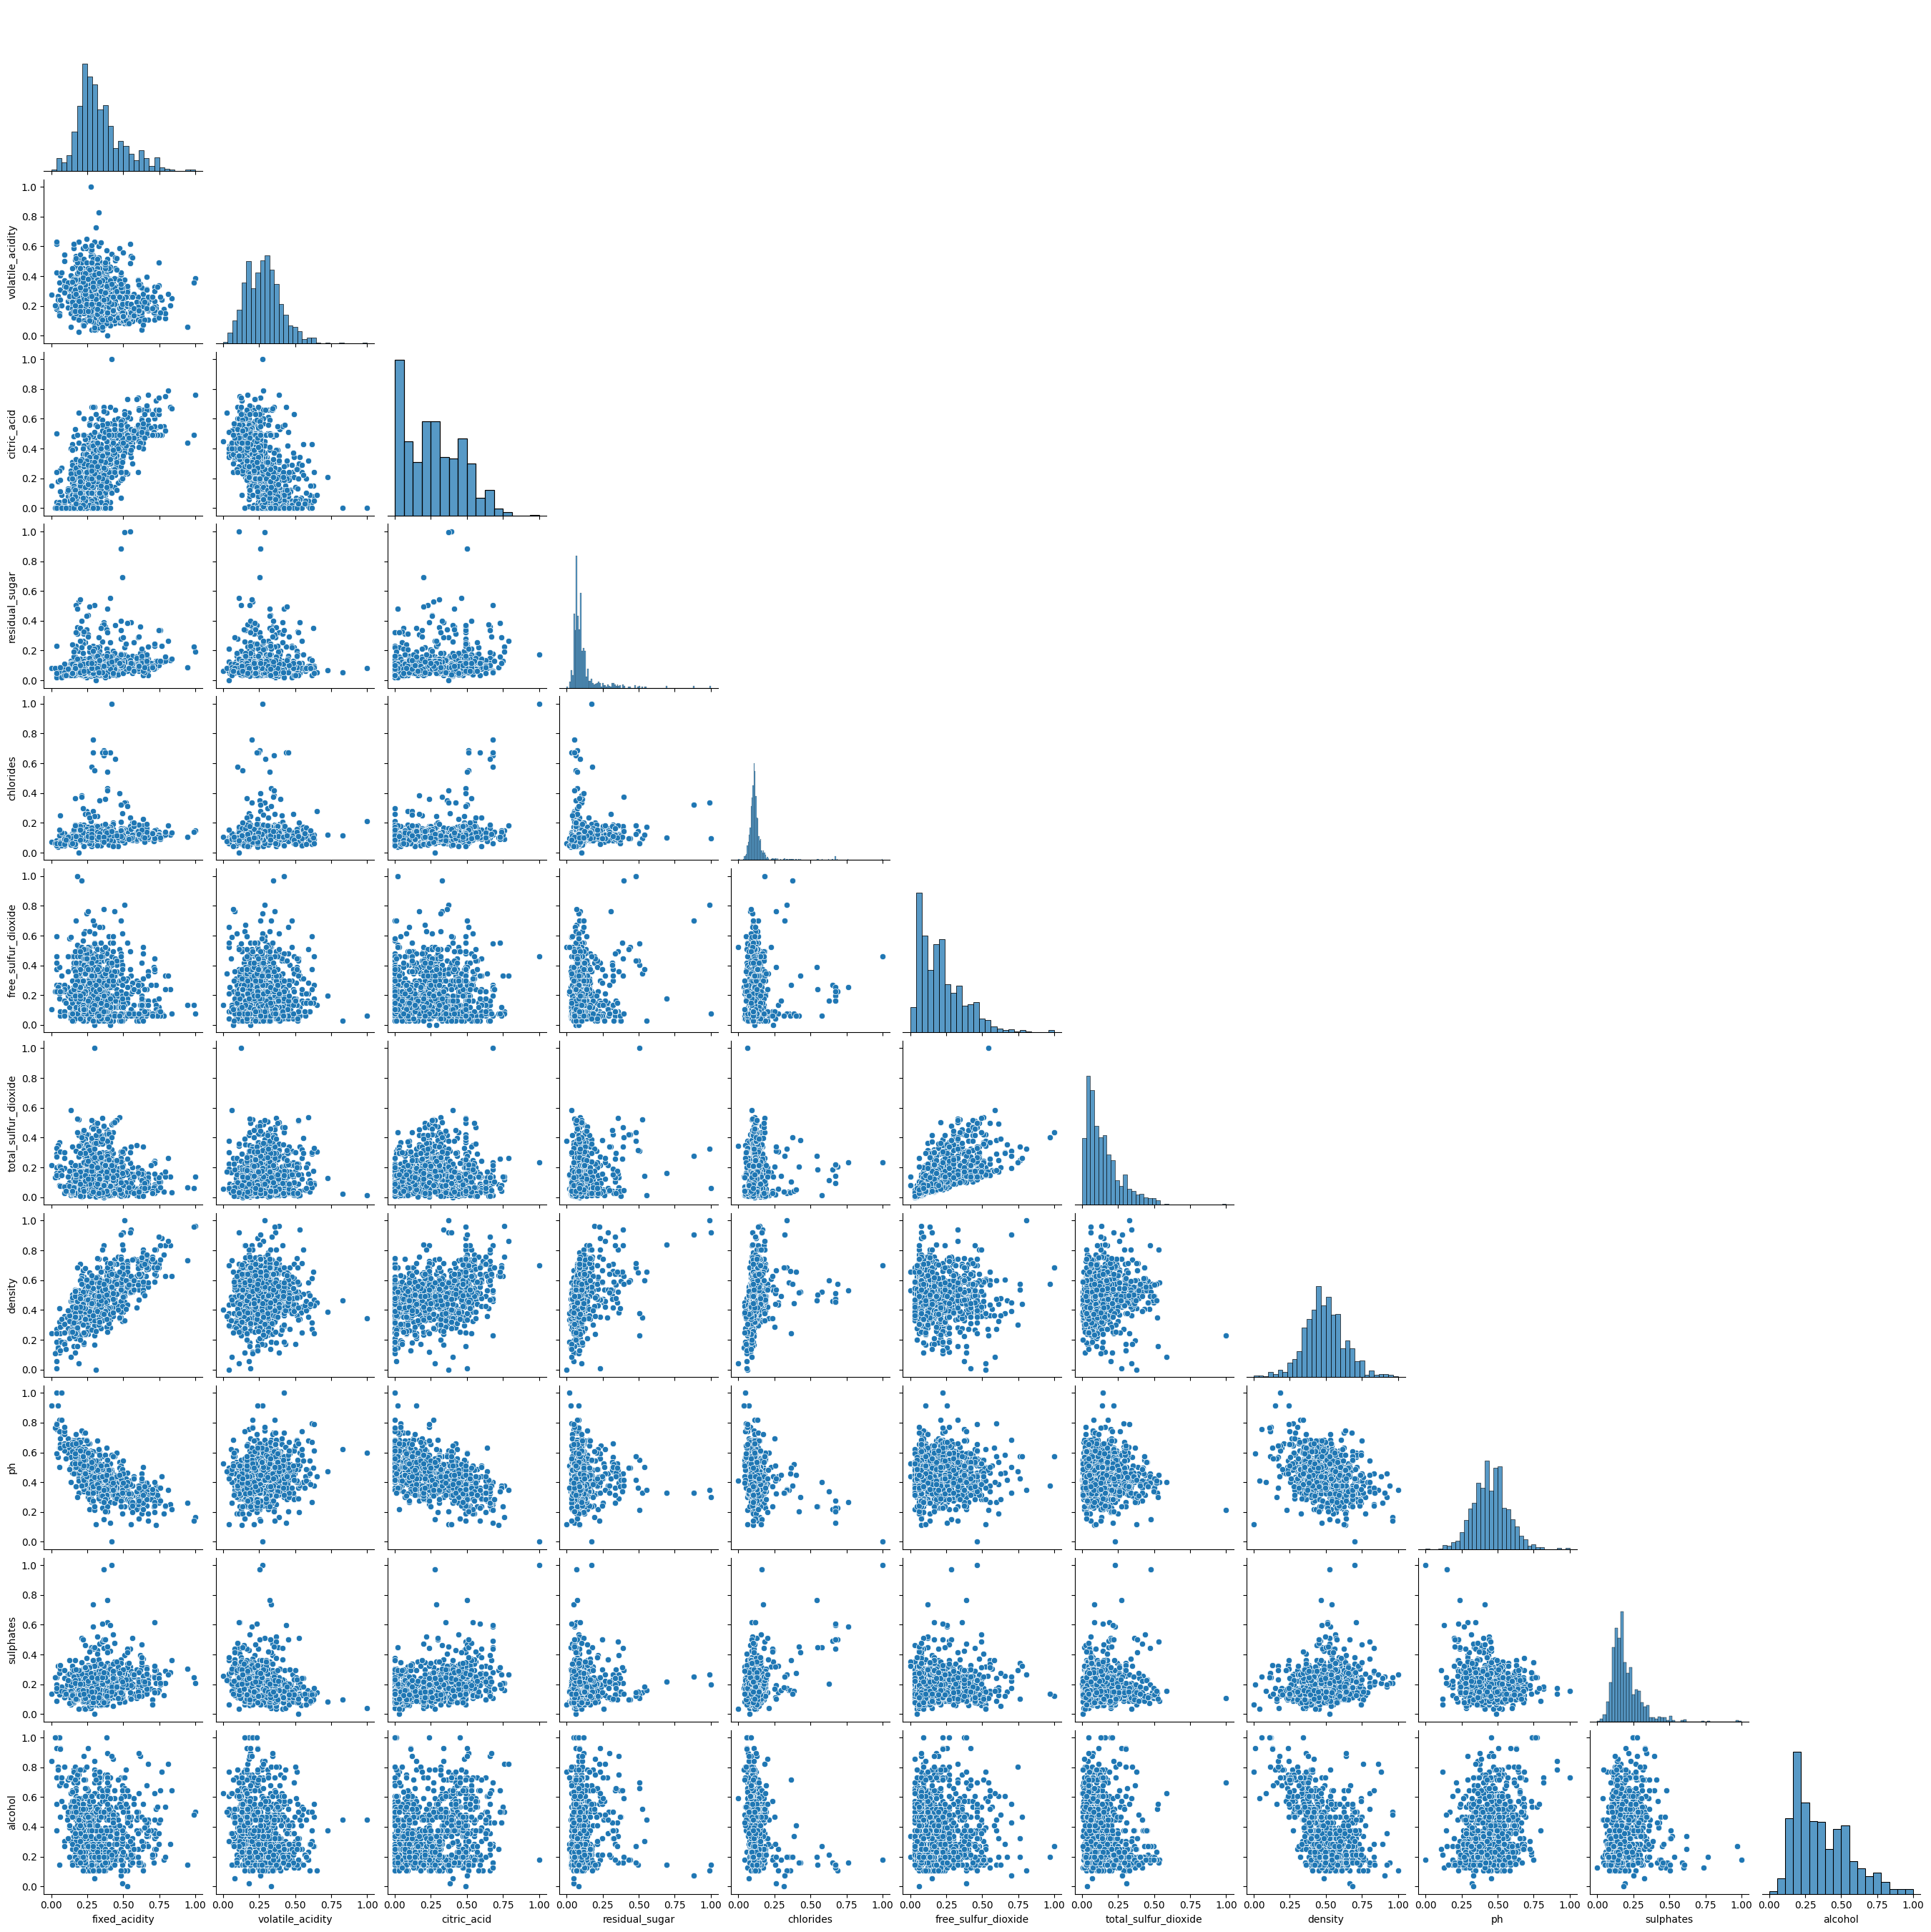

In [ ]:
sns.pairplot(df_train_sc, corner=True)
plt.show()

In [ ]:
#Step 4 ML
wine_clue_kmeans = KMeans(n_clusters=2, random_state=2025)
wine_clue_kmeans.fit(df_train_sc)

KMeans(n_clusters=2, random_state=2025)

In [ ]:
labels = wine_clue_kmeans.labels_
df_clustered = df_train
df_clustered['cluster'] = labels

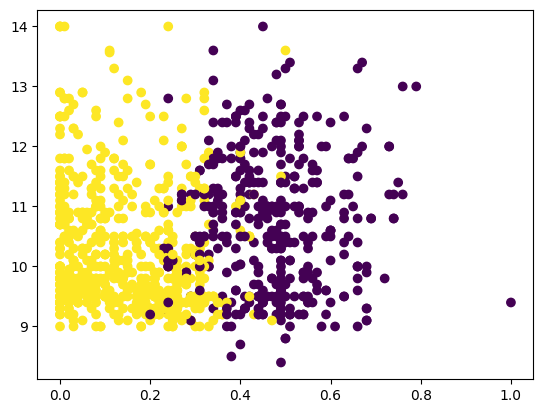

In [ ]:
plt.scatter(x=df_clustered['citric_acid'], y=df_clustered['alcohol'], c=df_clustered['cluster'])
plt.show()

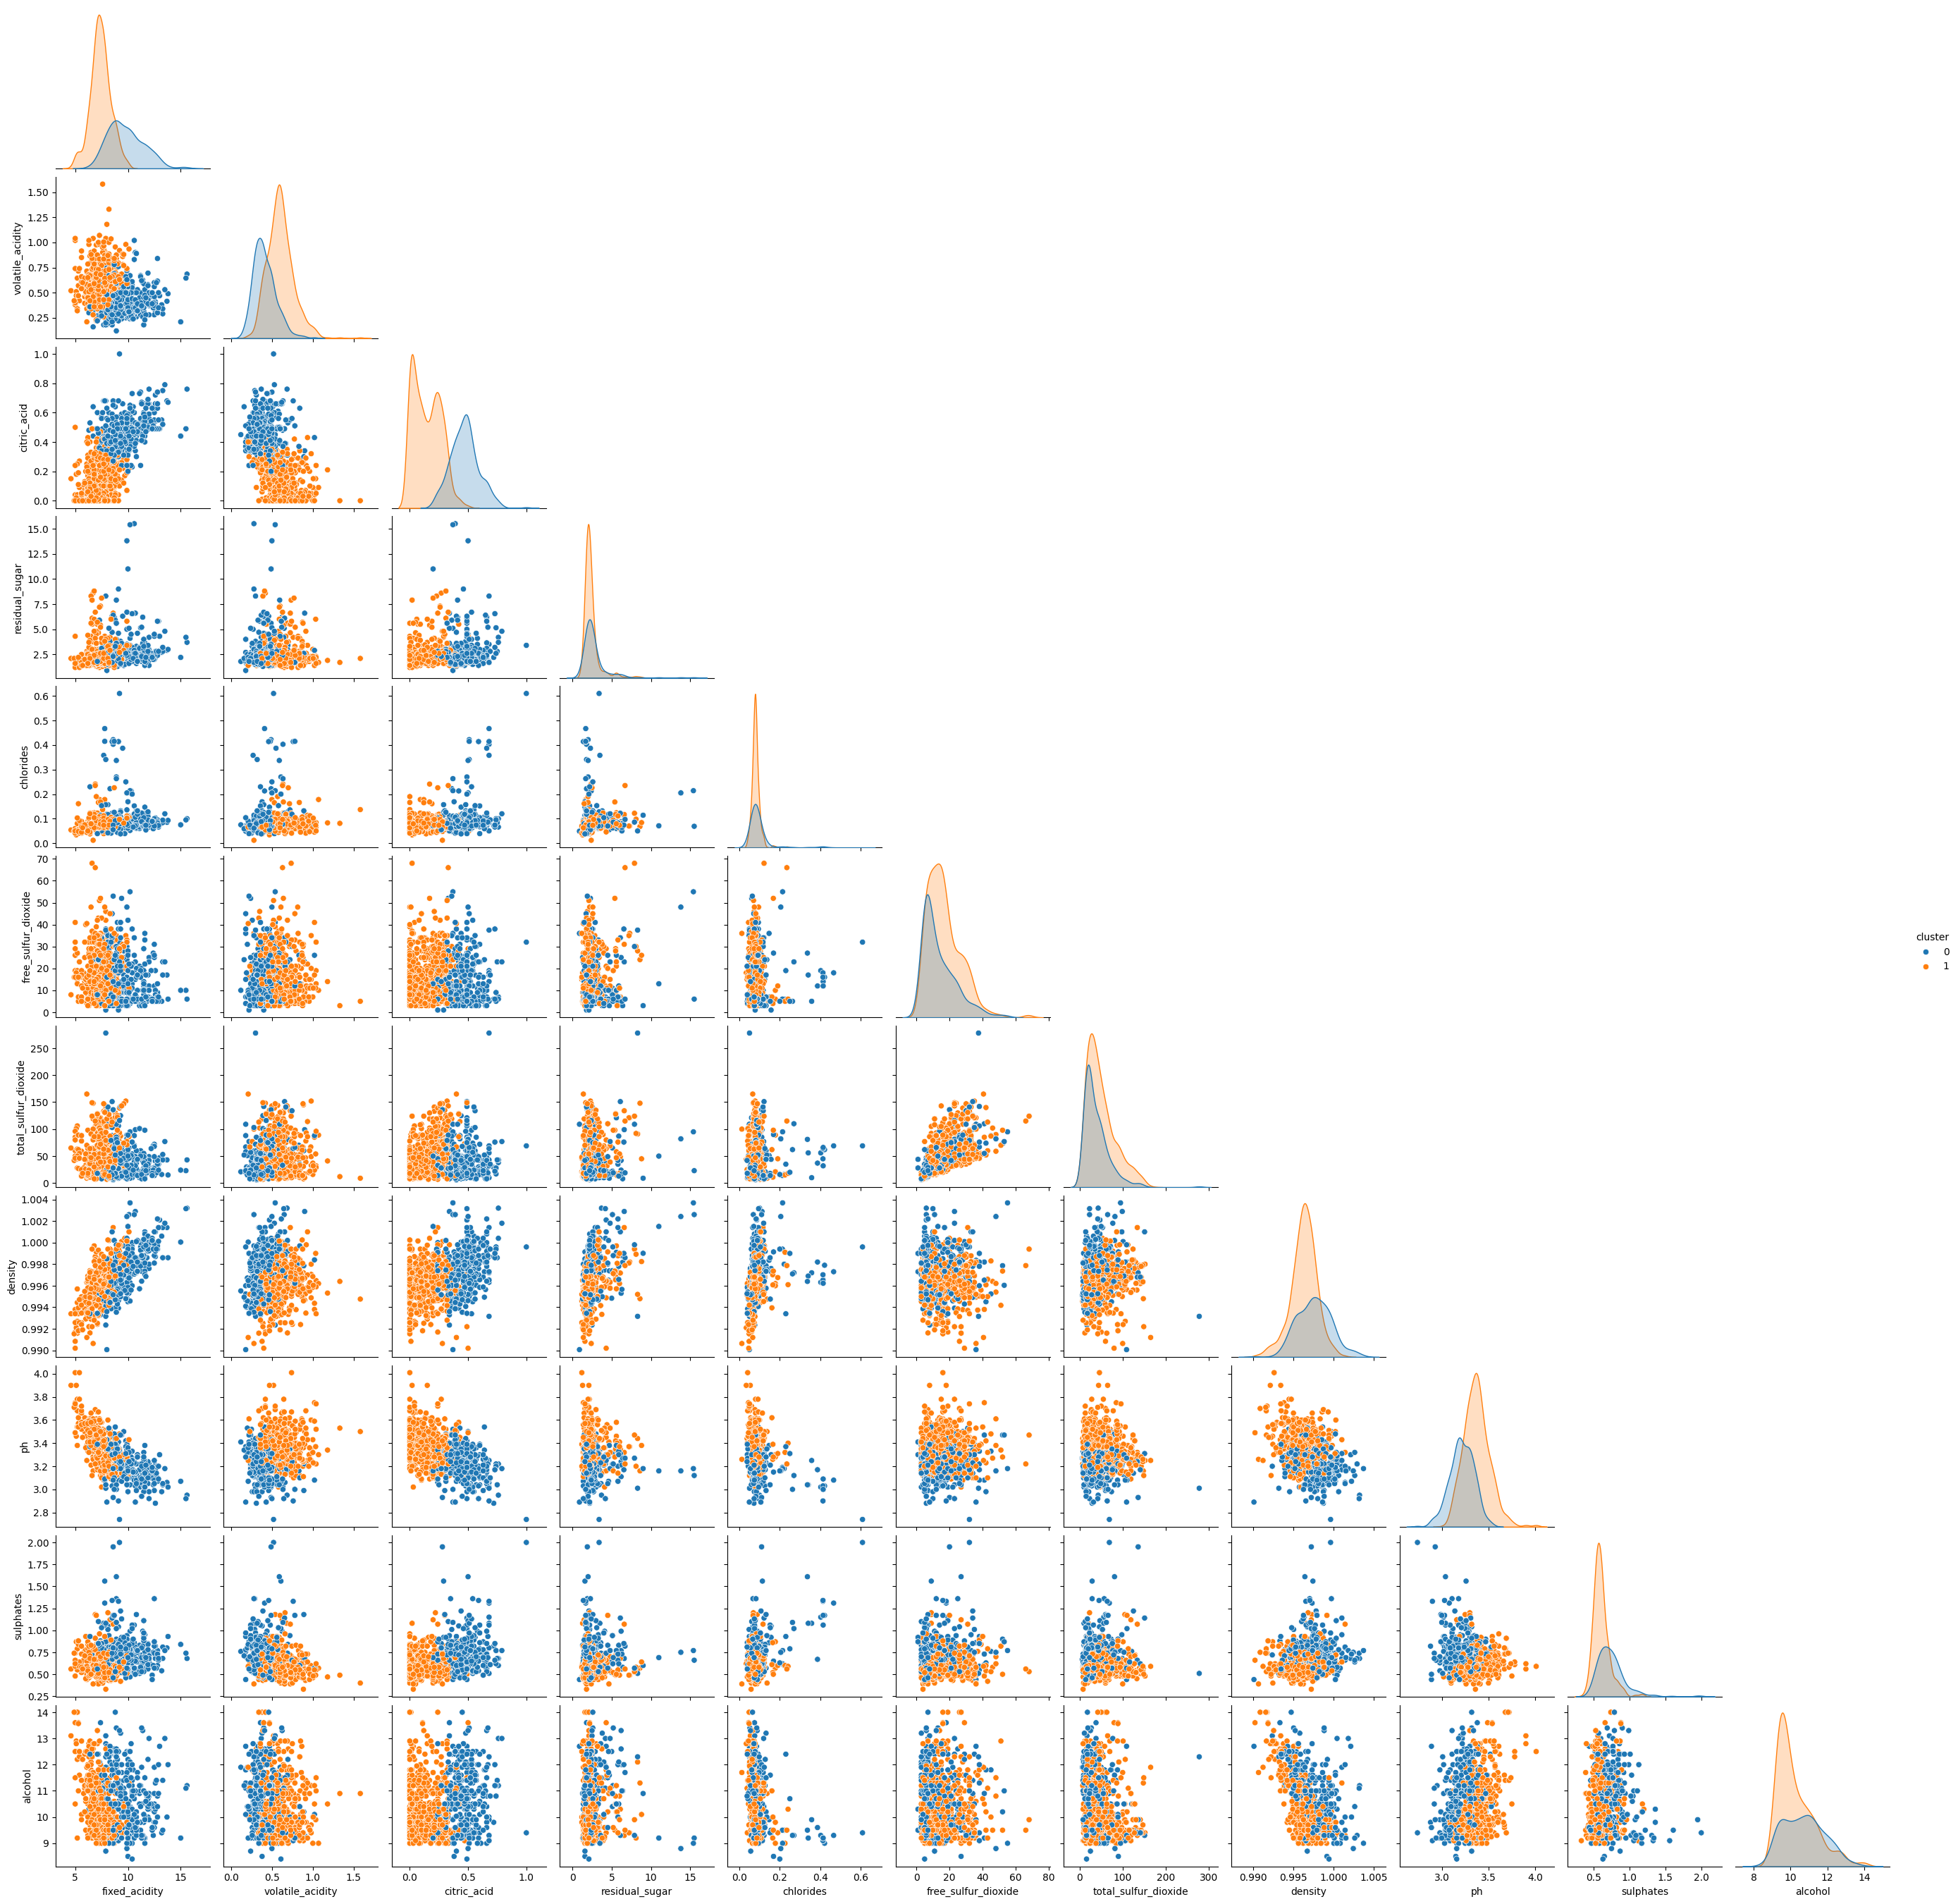

In [ ]:
sns.pairplot(df_clustered, hue='cluster', corner=True)
plt.show()

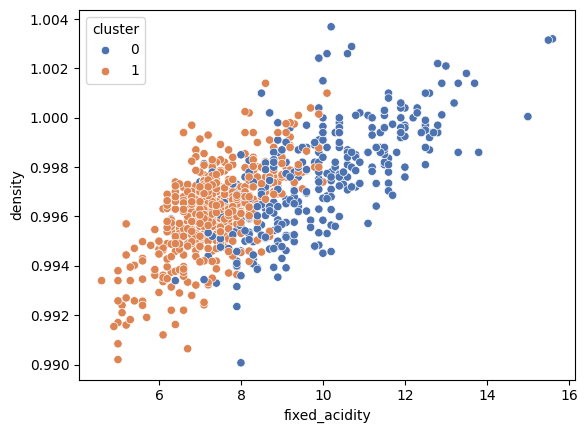

In [ ]:
sns.scatterplot(
  df_clustered,
  x='fixed_acidity',
  y='density',
  hue='cluster',
  palette='deep'
)
plt.show()

In [ ]:
inertia = []
K = range(1,10)
for k_iter in K:
  kmeans_wine = KMeans(n_clusters=k_iter)
  kmeans_wine.fit(df_train)
  inertia.append(kmeans_wine.inertia_)

In [ ]:
df_train_sc.shape

(1028, 11)

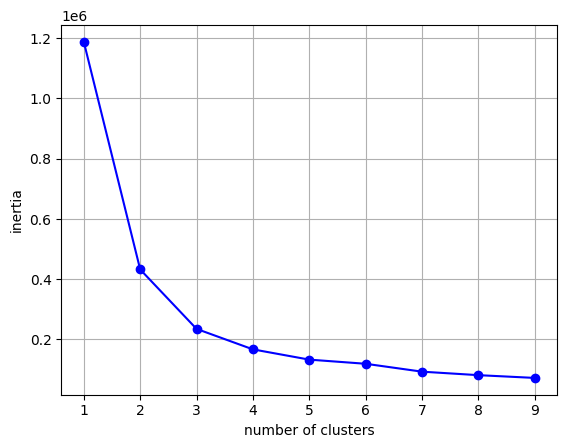

In [ ]:
plt.plot(K, inertia, "bo-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.show()